<a href="https://colab.research.google.com/github/RaviKcse08/datascience_projs/blob/main/DC_Intro_mutualInformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from pprint import pprint

In [4]:

#read bank marketing csv
sd = pd.read_csv('bank_marketing.csv')

sd.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,,pdays,previous,putcome,y
0,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
1,27,unemployed,married,primary,no,7459,yes,no,unknown,9,may,407,2,-1,0,unknown,no
2,59,management,divorced,primary,no,13308,yes,no,unknown,13,may,131,1,-1,0,unknown,no
3,48,technician,married,secondary,no,7373,yes,no,unknown,14,may,126,1,-1,0,unknown,no
4,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes


In [5]:
#check Unique values of education feature
print(sd['education'].unique())


['tertiary' 'primary' 'secondary' 'unknown']


In [6]:
 #transform education feature into categorical classes
edn = {'tertiary': 101, 'primary': 102, 'secondary': 103, 'unknown': 104}

sd['edcn'] = sd['education'].map(edn)
sd.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,,pdays,previous,putcome,y,edcn
0,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no,101
1,27,unemployed,married,primary,no,7459,yes,no,unknown,9,may,407,2,-1,0,unknown,no,102
2,59,management,divorced,primary,no,13308,yes,no,unknown,13,may,131,1,-1,0,unknown,no,102
3,48,technician,married,secondary,no,7373,yes,no,unknown,14,may,126,1,-1,0,unknown,no,103
4,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes,103


In [7]:
#check unique values of marital feature
print(sd['marital'].unique())

['married' 'divorced' 'single']


In [83]:
 #transform marital status feature into categorical classes
mrtl = {'married': 201, 'divorced': 202, 'single': 203}

sd['mrtal'] = sd['marital'].map(mrtl)
sd.head()

lbl_map = {'yes': 1, 'no': 0}

sd['label'] = sd['y'].map(lbl_map)
sd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,,pdays,previous,putcome,y,edcn,mrtal,label
0,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no,101,201,0
1,27,unemployed,married,primary,no,7459,yes,no,unknown,9,may,407,2,-1,0,unknown,no,102,201,0
2,59,management,divorced,primary,no,13308,yes,no,unknown,13,may,131,1,-1,0,unknown,no,102,202,0
3,48,technician,married,secondary,no,7373,yes,no,unknown,14,may,126,1,-1,0,unknown,no,103,201,0
4,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes,103,201,1


In [84]:



##Select Xs - age, job, marital, education, balance)
#print(sd['education'].unique())
df = sd[['age','edcn','mrtal','balance','label']].head(5000)
df.shape


#taking 500 records and 5 features

(5000, 5)

In [86]:
train_df, test_df = train_test_split(df, test_size=.25)
train_df.shape

data = train_df.values
data[:5]

#split data with train_test_split function based on 20% ratio
#data[:5]

array([[  48,  103,  201,  638,    0],
       [  41,  101,  201,  744,    0],
       [  37,  103,  201,  281,    0],
       [  43,  101,  202, 1026,    0],
       [  22,  103,  203,  650,    0]])

In [87]:
#helper function to check uncertainity
def calculate_uncertainity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False
        

In [88]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [89]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):          # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

In [90]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

In [91]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [92]:
def calculate_mutual_information(data, data_x, data_y):
    
    n = len(data_x) + len(data_y)
    p_data_x = len(data_x) / n
    p_data_y = len(data_y) / n

    mutual_information =  (p_data_x * calculate_entropy(data_x) 
                      + p_data_y * calculate_entropy(data_y)) - calculate_entropy(data)
    
    return mutual_information 

In [93]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_x, data_y = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_mutual_information(data, data_x, data_y)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [94]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

In [95]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (calculate_uncertainity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # checking for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [96]:
tree_df = decision_tree_algorithm(train_df, max_depth=5)
pprint(tree_df)

{'balance <= 6400': [{'mrtal = 201': [{'balance <= 1164': [{'balance <= 994': [{'balance <= 985': [0,
                                                                                                   1]},
                                                                               0]},
                                                           0]},
                                      {'balance <= 3285': [{'balance <= 1742': [{'balance <= 1724': [0,
                                                                                                     1]},
                                                                                0]},
                                                           {'balance <= 3326': [1,
                                                                                0]}]}]},
                     {'balance <= 14220': [{'balance <= 6403': [1,
                                                                {'age <= 72': [0,
                              

In [97]:
def classify_sample(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":  # feature is continuous
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_sample(example, residual_tree)

In [98]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_sample, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [99]:
accuracy = calculate_accuracy(test_df, tree_df)
print("Accuracy of Tree " + str(accuracy*100))

Accuracy of Tree 95.44


In [122]:
accuracy = calculate_accuracy(train_df, tree_df)
print("Accuracy of Tree " + str(accuracy*100))

Accuracy of Tree 95.73333333333333


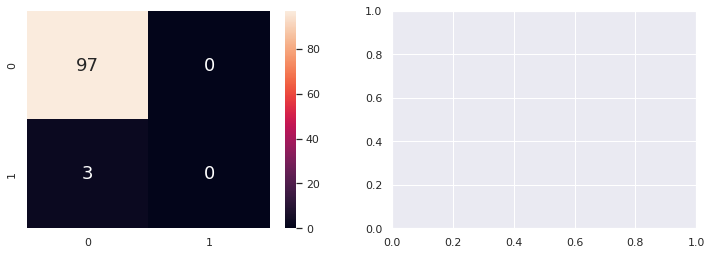

In [130]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

X_test = test_df[['age','edcn','mrtal','balance','label']]
y_test = test_df['label'].head(100)
y_test_pred = test_df['classification'].head(100)

from sklearn.metrics import classification_report, confusion_matrix
f, axes = plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size":18}, ax=axes[0])

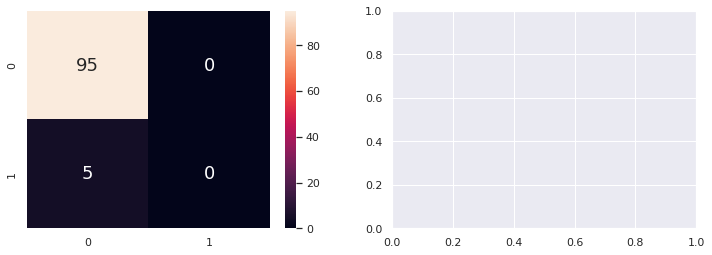

In [131]:
y_train = train_df['label'].head(100)
y_train_pred = train_df['classification'].head(100)
f, axes = plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size":18}, ax=axes[0])

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       0.00      0.00      0.00         3

    accuracy                           0.97       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.94      0.97      0.96       100

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

In [109]:

y_train_pred = decision_tree_algorithm.predict(train_df)
y_test_pred = decision_tree_algorithm.predict(X_test)

AttributeError: ignored

In [105]:
print("Classification Acc \t Train:", dectree.score(train_df, train_df['label']))
print("Classification Acc \t Test:", dectree.score(X_test, y_test))


Classification Acc 	 Train: 1.0
Classification Acc 	 Test: 1.0


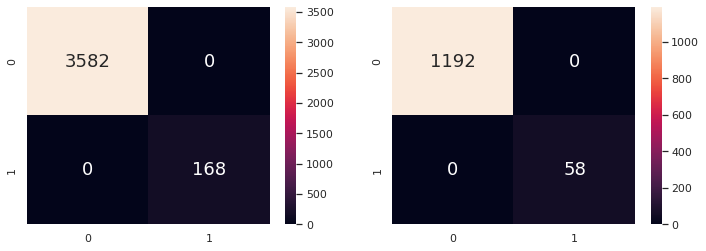

In [106]:
f, axes = plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(train_df['label'], y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size":18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size":18}, ax=axes[1])